Imports

In [6]:
import numpy as np
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from utils import extract_time
from utils import random_generator
from utils import MinMaxScaler
from utils import sine_data_generation
from utils import visualization

from modules_and_training import TimeGAN
from modules_and_training import Time_GAN_module


Parameters

In [7]:
#output_size = 20
gamma = 1
no, seq_len, dim = 12800, 24, 5

parameters = dict()
parameters['module'] = 'gru' 
parameters['hidden_dim'] = 40
parameters['num_layers'] = 1
parameters['iterations'] = 100
parameters['batch_size'] = 128
parameters['epoch'] = 2

Data Generation:
12800 synthetic time univariate timeseries are created, with 24 timesteps each 

In [8]:
data = sine_data_generation(no, seq_len, dim)
data = MinMaxScaler(data)
data = torch.Tensor(data)
data.shape

torch.Size([12800, 24, 5])

Training and Examination of generating process: for each epoch a single sample is generated from the current state of the generator and visualized alongside with the coressponding loss values

Start Embedding Network Training
step: 1/2, e_loss: 0.770181
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 1/2, s_loss: 0.102114305
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/2, D_loss: 3.6043715, G_loss_U: 0.2561171, G_loss_S: 0.007316262, E_loss_t0: 2.44501


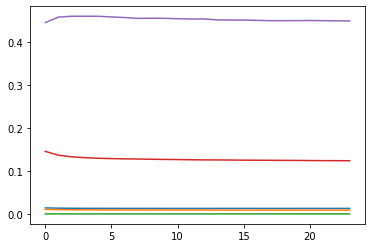

step: 0/2, D_loss: 3.129847, G_loss_U: 0.35941228, G_loss_S: 0.0074407654, E_loss_t0: 2.4168599


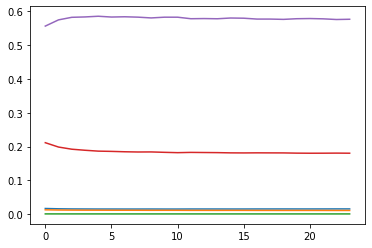

step: 0/2, D_loss: 2.6084847, G_loss_U: 0.49360347, G_loss_S: 0.007764569, E_loss_t0: 2.4144547


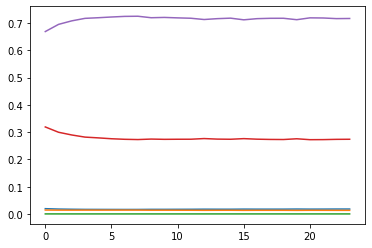

step: 0/2, D_loss: 2.2410266, G_loss_U: 0.6468217, G_loss_S: 0.007569271, E_loss_t0: 2.3919523


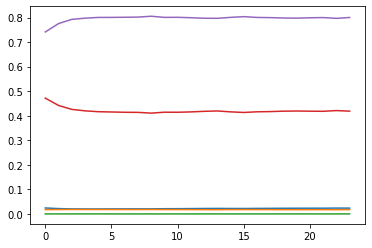

step: 0/2, D_loss: 2.0247903, G_loss_U: 0.80802244, G_loss_S: 0.007431957, E_loss_t0: 2.3616638


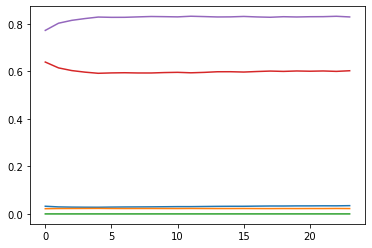

step: 0/2, D_loss: 1.9154806, G_loss_U: 0.9661266, G_loss_S: 0.0073559573, E_loss_t0: 2.3405619


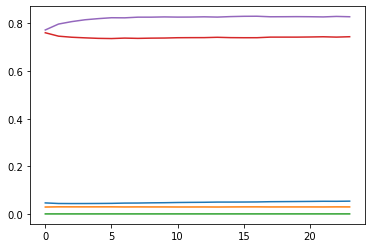

step: 0/2, D_loss: 1.8718663, G_loss_U: 1.1083575, G_loss_S: 0.007596159, E_loss_t0: 2.3180816


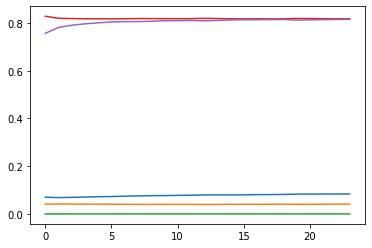

step: 0/2, D_loss: 1.8625252, G_loss_U: 1.2201883, G_loss_S: 0.007576077, E_loss_t0: 2.3345451


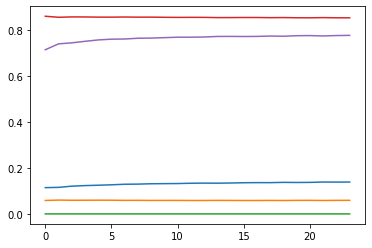

step: 0/2, D_loss: 1.8690542, G_loss_U: 1.2879642, G_loss_S: 0.0070789126, E_loss_t0: 2.274376


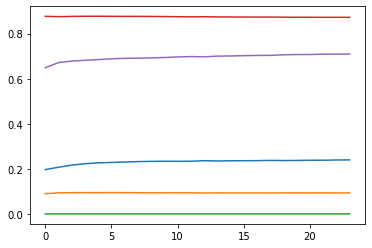

step: 0/2, D_loss: 1.8718591, G_loss_U: 1.304984, G_loss_S: 0.0072628, E_loss_t0: 2.2045028


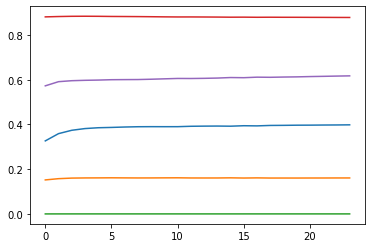

step: 0/2, D_loss: 1.8572615, G_loss_U: 1.2743131, G_loss_S: 0.0072928113, E_loss_t0: 2.17411


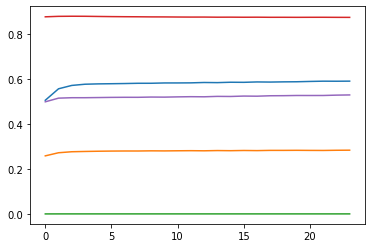

step: 0/2, D_loss: 1.8266337, G_loss_U: 1.2054536, G_loss_S: 0.0074780905, E_loss_t0: 2.0970492


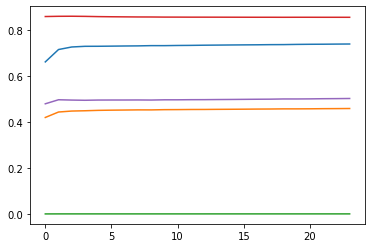

step: 0/2, D_loss: 1.7812927, G_loss_U: 1.1115904, G_loss_S: 0.0072640036, E_loss_t0: 2.037811


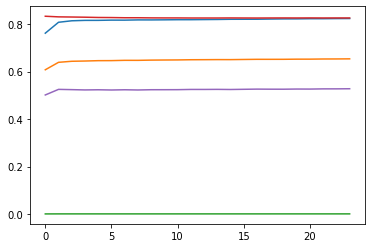

step: 0/2, D_loss: 1.7332026, G_loss_U: 1.0059861, G_loss_S: 0.0071802735, E_loss_t0: 2.0318635


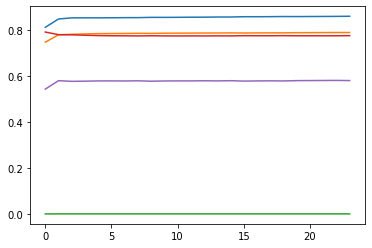

step: 0/2, D_loss: 1.692126, G_loss_U: 0.8996865, G_loss_S: 0.007918655, E_loss_t0: 2.0529647


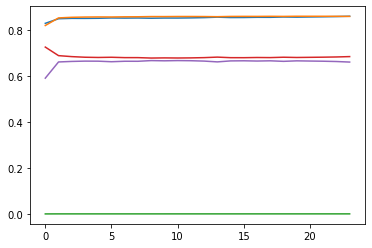

step: 0/2, D_loss: 1.6536902, G_loss_U: 0.8044746, G_loss_S: 0.008048192, E_loss_t0: 2.0499063


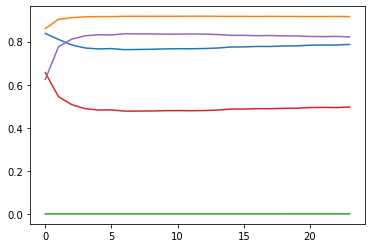

step: 0/2, D_loss: 1.6297709, G_loss_U: 0.7287047, G_loss_S: 0.0076151015, E_loss_t0: 2.080202


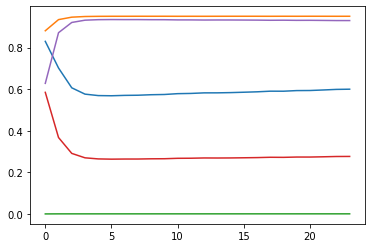

step: 0/2, D_loss: 1.6027569, G_loss_U: 0.676977, G_loss_S: 0.007697251, E_loss_t0: 2.0685313


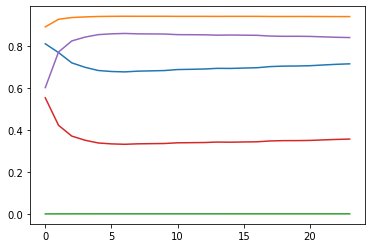

step: 0/2, D_loss: 1.569637, G_loss_U: 0.6513198, G_loss_S: 0.007792614, E_loss_t0: 2.083089


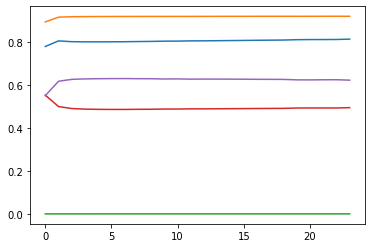

step: 0/2, D_loss: 1.5341463, G_loss_U: 0.65407926, G_loss_S: 0.00815343, E_loss_t0: 2.0649955


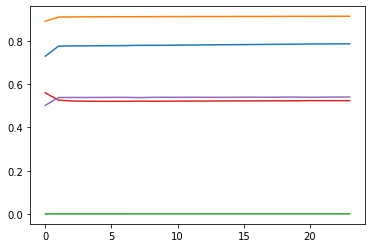

step: 0/2, D_loss: 1.4917077, G_loss_U: 0.6934149, G_loss_S: 0.008191053, E_loss_t0: 2.084256


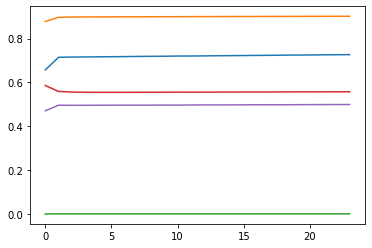

step: 0/2, D_loss: 1.4400847, G_loss_U: 0.7849891, G_loss_S: 0.008162837, E_loss_t0: 2.0541637


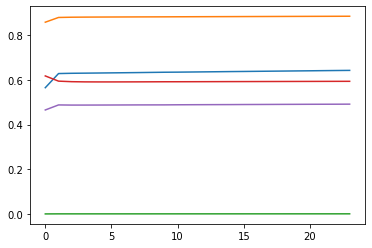

step: 0/2, D_loss: 1.3863311, G_loss_U: 0.9486324, G_loss_S: 0.008340653, E_loss_t0: 2.037889


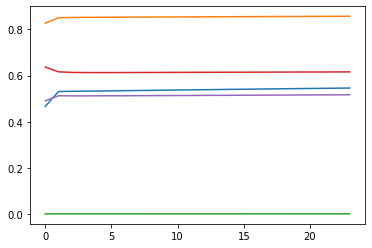

step: 0/2, D_loss: 1.3426039, G_loss_U: 1.1401931, G_loss_S: 0.008754899, E_loss_t0: 2.0259283


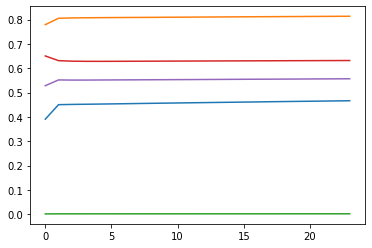

step: 0/2, D_loss: 1.2776053, G_loss_U: 1.1207241, G_loss_S: 0.0086939605, E_loss_t0: 2.0293946


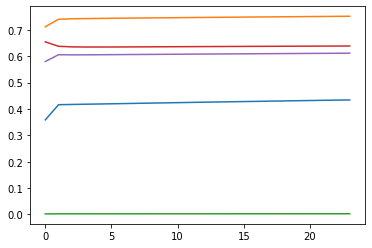

step: 0/2, D_loss: 1.125064, G_loss_U: 0.990479, G_loss_S: 0.009279068, E_loss_t0: 2.0083394


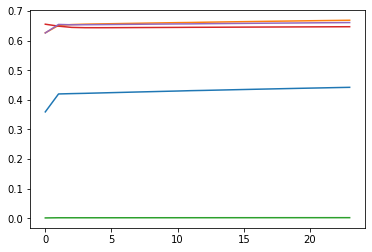

step: 0/2, D_loss: 0.9772275, G_loss_U: 1.8579272, G_loss_S: 0.009788267, E_loss_t0: 2.001731


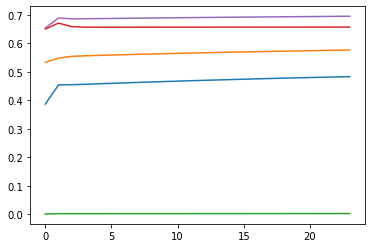

step: 0/2, D_loss: 0.8741513, G_loss_U: 1.7752422, G_loss_S: 0.010279937, E_loss_t0: 2.0090191


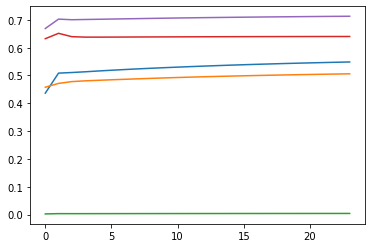

step: 0/2, D_loss: 0.5560005, G_loss_U: 0.7612934, G_loss_S: 0.011049727, E_loss_t0: 2.0014808


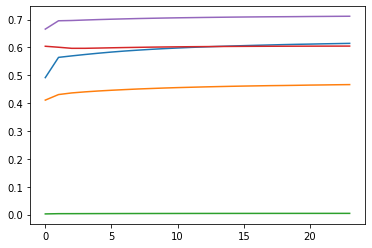

step: 0/2, D_loss: 0.9923113, G_loss_U: 2.676882, G_loss_S: 0.011925943, E_loss_t0: 1.9901792


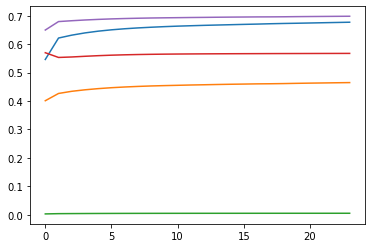

step: 0/2, D_loss: 0.63014156, G_loss_U: 3.0680933, G_loss_S: 0.013419986, E_loss_t0: 2.0083508


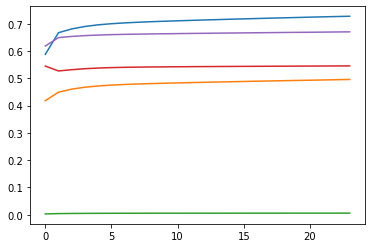

step: 0/2, D_loss: 2.3727708, G_loss_U: 3.235801, G_loss_S: 0.015171242, E_loss_t0: 1.9922975


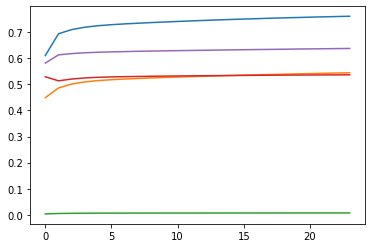

step: 0/2, D_loss: 2.5657263, G_loss_U: 3.272237, G_loss_S: 0.019466031, E_loss_t0: 2.0048172


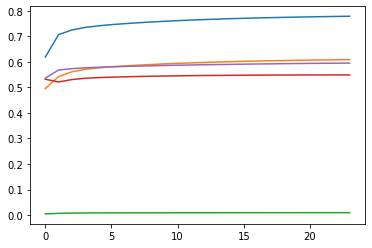

step: 0/2, D_loss: 2.5740902, G_loss_U: 3.2187004, G_loss_S: 0.022648761, E_loss_t0: 1.9725336


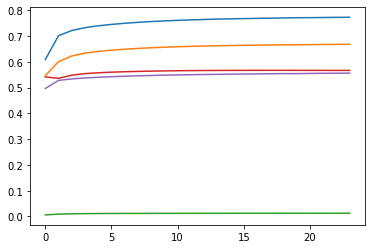

step: 0/2, D_loss: 2.4598722, G_loss_U: 3.1010249, G_loss_S: 0.027572345, E_loss_t0: 1.9848899


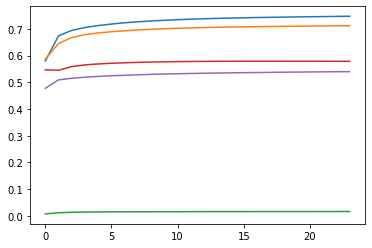

step: 0/2, D_loss: 2.230831, G_loss_U: 2.9387, G_loss_S: 0.03430664, E_loss_t0: 1.9754366


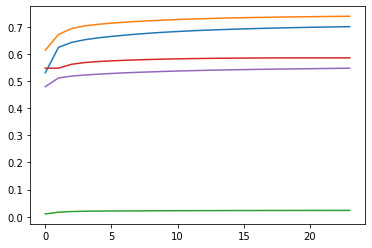

step: 0/2, D_loss: 1.909422, G_loss_U: 2.7481768, G_loss_S: 0.044736616, E_loss_t0: 1.9832494


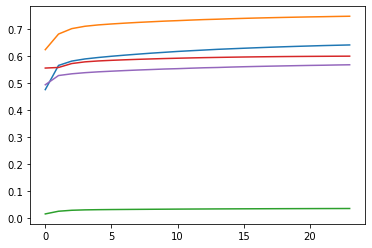

step: 0/2, D_loss: 1.6150824, G_loss_U: 2.542227, G_loss_S: 0.0528396, E_loss_t0: 1.9682577


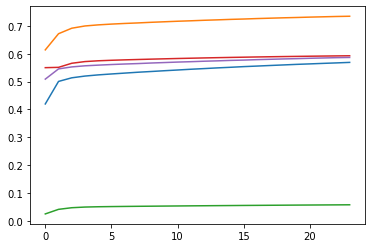

step: 0/2, D_loss: 1.301604, G_loss_U: 2.3333511, G_loss_S: 0.06389753, E_loss_t0: 1.9407662


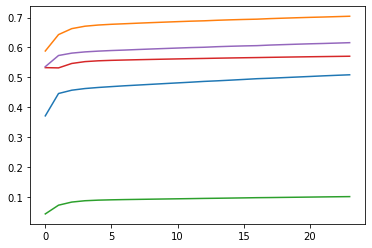

step: 0/2, D_loss: 0.9400779, G_loss_U: 2.1370363, G_loss_S: 0.082245, E_loss_t0: 1.8910724


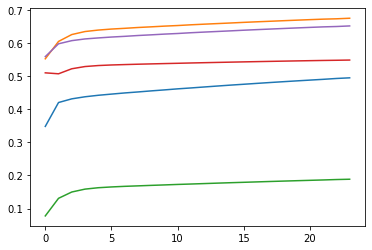

step: 0/2, D_loss: 0.7011622, G_loss_U: 1.965949, G_loss_S: 0.09558181, E_loss_t0: 1.7744035


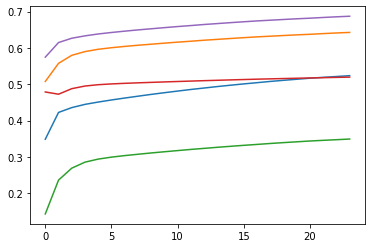

step: 0/2, D_loss: 0.5242748, G_loss_U: 1.8301009, G_loss_S: 0.11273917, E_loss_t0: 1.6780136


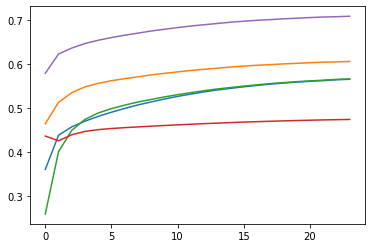

step: 0/2, D_loss: 0.45928192, G_loss_U: 1.7319398, G_loss_S: 0.12934612, E_loss_t0: 1.6794583


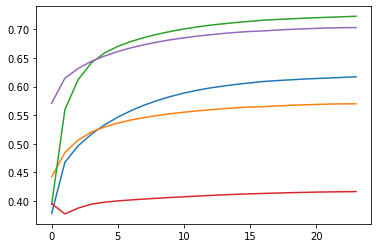

step: 0/2, D_loss: 0.45436522, G_loss_U: 1.669274, G_loss_S: 0.14034235, E_loss_t0: 1.7260053


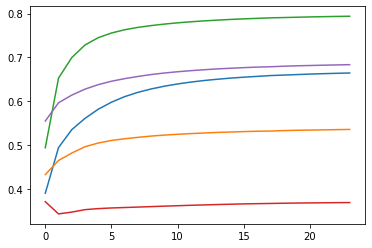

step: 0/2, D_loss: 0.45314172, G_loss_U: 1.6391587, G_loss_S: 0.14999944, E_loss_t0: 1.7457051


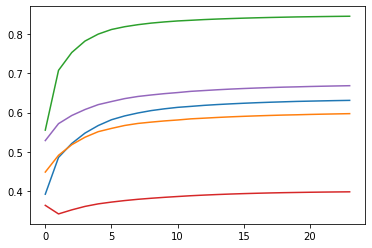

step: 0/2, D_loss: 0.44565573, G_loss_U: 1.638587, G_loss_S: 0.15727732, E_loss_t0: 1.7109816


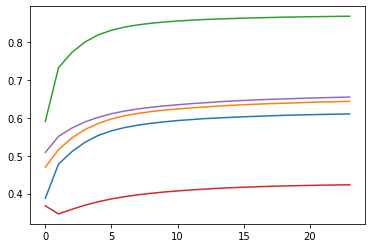

step: 0/2, D_loss: 0.4326804, G_loss_U: 1.6644315, G_loss_S: 0.16137452, E_loss_t0: 1.750842


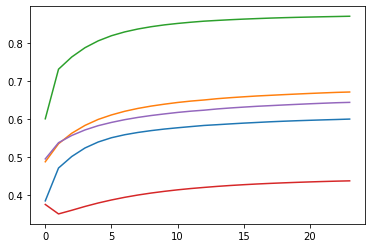

step: 0/2, D_loss: 0.40960732, G_loss_U: 1.7135884, G_loss_S: 0.16587102, E_loss_t0: 1.7539225


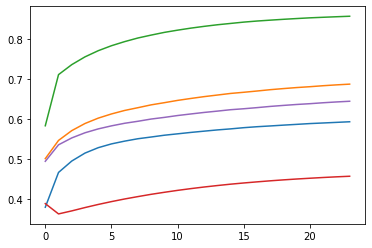

step: 0/2, D_loss: 0.3821868, G_loss_U: 1.7827228, G_loss_S: 0.16922447, E_loss_t0: 1.6855831


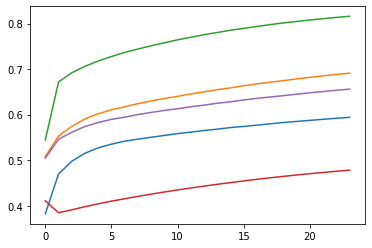

step: 0/2, D_loss: 0.35123676, G_loss_U: 1.8683978, G_loss_S: 0.17184052, E_loss_t0: 1.6589257


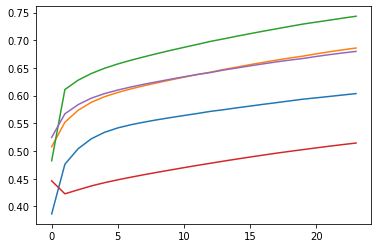

step: 0/2, D_loss: 0.31859562, G_loss_U: 1.9672837, G_loss_S: 0.17341919, E_loss_t0: 1.6685694


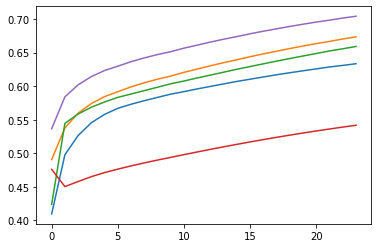

step: 0/2, D_loss: 0.28652716, G_loss_U: 2.076329, G_loss_S: 0.17434576, E_loss_t0: 1.6998513


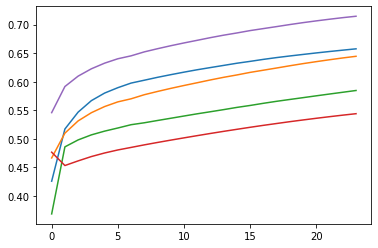

step: 0/2, D_loss: 0.25616655, G_loss_U: 2.1928668, G_loss_S: 0.17506823, E_loss_t0: 1.6780032


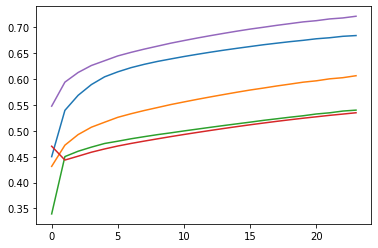

step: 0/2, D_loss: 0.22833288, G_loss_U: 2.3146071, G_loss_S: 0.17454821, E_loss_t0: 1.7064109


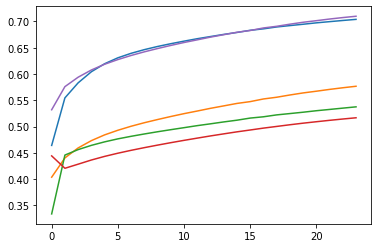

step: 0/2, D_loss: 0.20268655, G_loss_U: 2.4396164, G_loss_S: 0.17468014, E_loss_t0: 1.6892676


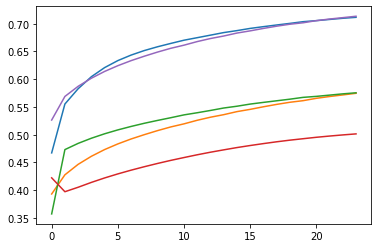

step: 0/2, D_loss: 0.18035616, G_loss_U: 2.5662382, G_loss_S: 0.17356445, E_loss_t0: 1.6835923


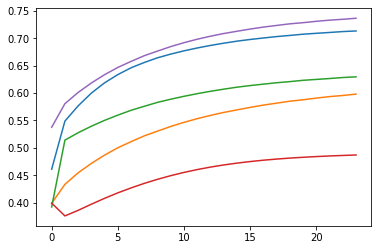

step: 0/2, D_loss: 0.16067827, G_loss_U: 2.6930797, G_loss_S: 0.17323346, E_loss_t0: 1.640269


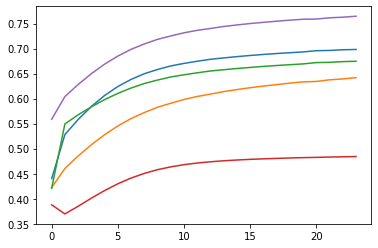

step: 0/2, D_loss: 0.14325625, G_loss_U: 2.692908, G_loss_S: 0.17234842, E_loss_t0: 1.6509575


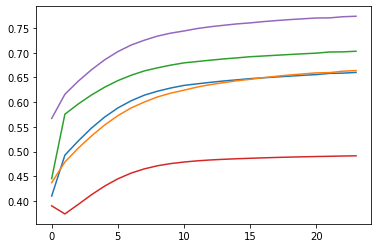

step: 0/2, D_loss: 0.1427539, G_loss_U: 2.6927204, G_loss_S: 0.17183805, E_loss_t0: 1.6384938


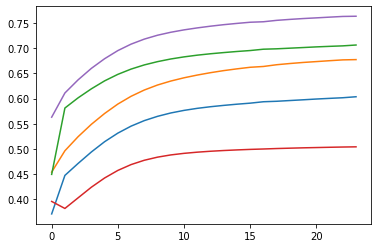

step: 0/2, D_loss: 0.14290205, G_loss_U: 2.6925151, G_loss_S: 0.17131779, E_loss_t0: 1.6439335


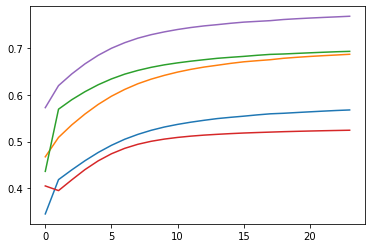

step: 0/2, D_loss: 0.14249831, G_loss_U: 2.6922903, G_loss_S: 0.17020474, E_loss_t0: 1.6526703


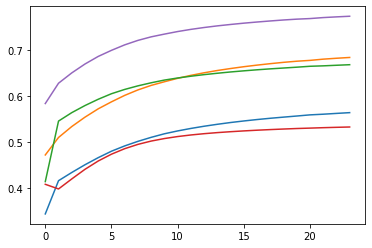

step: 0/2, D_loss: 0.14239775, G_loss_U: 2.692046, G_loss_S: 0.16950785, E_loss_t0: 1.6375188


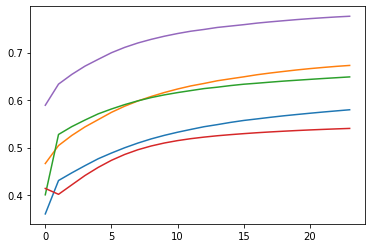

step: 0/2, D_loss: 0.14296776, G_loss_U: 2.6917775, G_loss_S: 0.16835883, E_loss_t0: 1.6487011


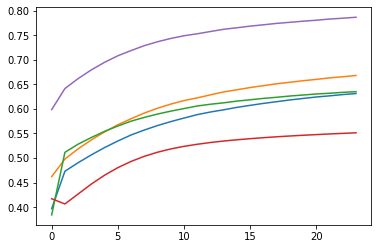

step: 0/2, D_loss: 0.14293513, G_loss_U: 2.69148, G_loss_S: 0.1671421, E_loss_t0: 1.627307


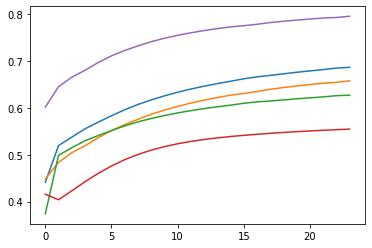

step: 0/2, D_loss: 0.14302893, G_loss_U: 2.6911533, G_loss_S: 0.16634642, E_loss_t0: 1.6194758


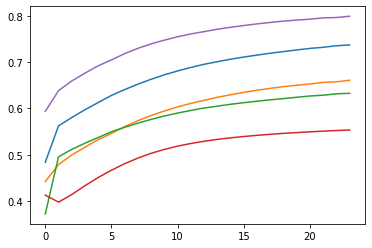

step: 0/2, D_loss: 0.14247565, G_loss_U: 2.6907928, G_loss_S: 0.1652277, E_loss_t0: 1.5873513


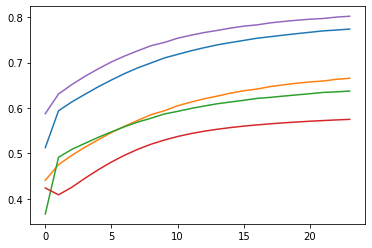

step: 0/2, D_loss: 0.14253215, G_loss_U: 2.6903903, G_loss_S: 0.16397622, E_loss_t0: 1.6472793


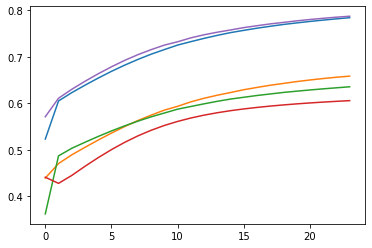

step: 0/2, D_loss: 0.1423938, G_loss_U: 2.689944, G_loss_S: 0.16304725, E_loss_t0: 1.6623573


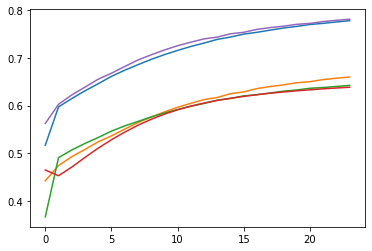

step: 0/2, D_loss: 0.14359275, G_loss_U: 2.689441, G_loss_S: 0.16195963, E_loss_t0: 1.6318187


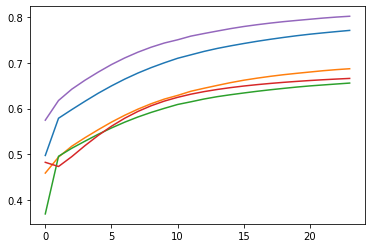

step: 0/2, D_loss: 0.14326586, G_loss_U: 2.688874, G_loss_S: 0.16099297, E_loss_t0: 1.6213956


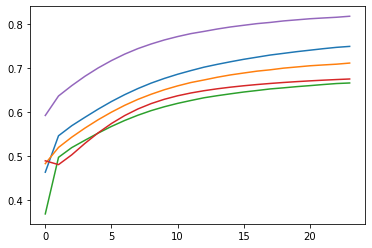

step: 0/2, D_loss: 0.14355762, G_loss_U: 2.6882389, G_loss_S: 0.1600296, E_loss_t0: 1.6095744


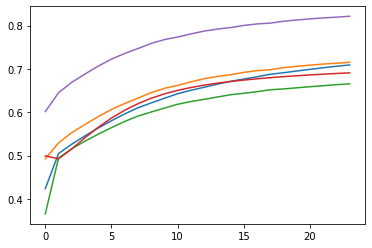

step: 0/2, D_loss: 0.14385033, G_loss_U: 2.687528, G_loss_S: 0.15884578, E_loss_t0: 1.6139516


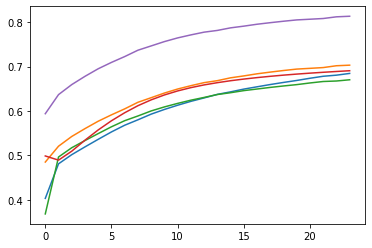

step: 0/2, D_loss: 0.14398462, G_loss_U: 2.6867237, G_loss_S: 0.15783668, E_loss_t0: 1.6003245


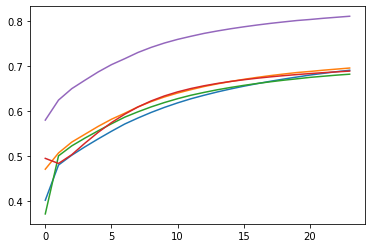

step: 0/2, D_loss: 0.14476068, G_loss_U: 2.6858003, G_loss_S: 0.1564136, E_loss_t0: 1.6025614


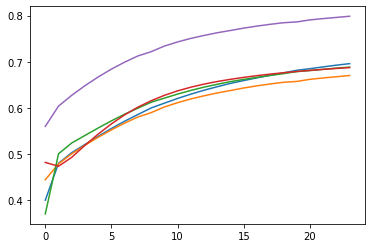

step: 0/2, D_loss: 0.14420526, G_loss_U: 2.684747, G_loss_S: 0.15541695, E_loss_t0: 1.5839196


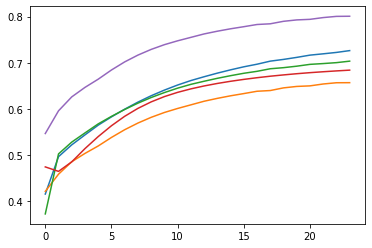

step: 0/2, D_loss: 0.14478135, G_loss_U: 2.6835058, G_loss_S: 0.15395735, E_loss_t0: 1.5961509


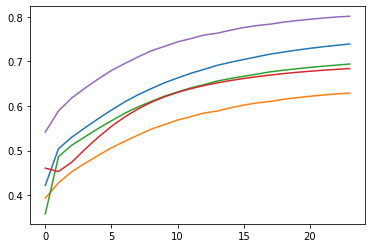

step: 0/2, D_loss: 0.14497942, G_loss_U: 2.68208, G_loss_S: 0.15246533, E_loss_t0: 1.5818008


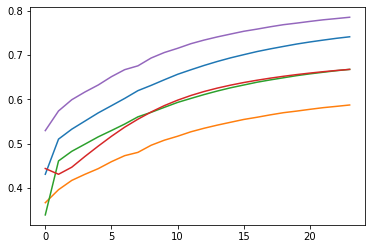

step: 0/2, D_loss: 0.14528397, G_loss_U: 2.6804454, G_loss_S: 0.1519586, E_loss_t0: 1.5821078


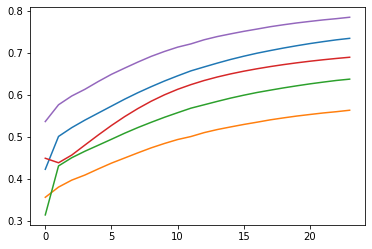

step: 0/2, D_loss: 0.14593726, G_loss_U: 2.6785219, G_loss_S: 0.15069807, E_loss_t0: 1.5664704


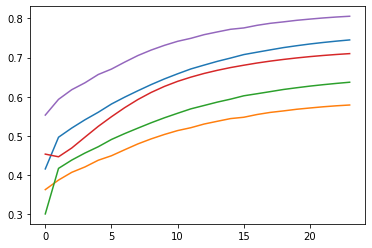

step: 0/2, D_loss: 0.14682218, G_loss_U: 2.6762562, G_loss_S: 0.14947015, E_loss_t0: 1.5807263


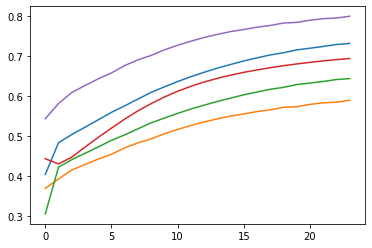

step: 0/2, D_loss: 0.14689597, G_loss_U: 2.6736689, G_loss_S: 0.14857675, E_loss_t0: 1.5272897


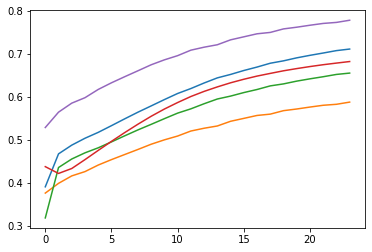

step: 0/2, D_loss: 0.14732856, G_loss_U: 2.6706476, G_loss_S: 0.14782016, E_loss_t0: 1.5394121


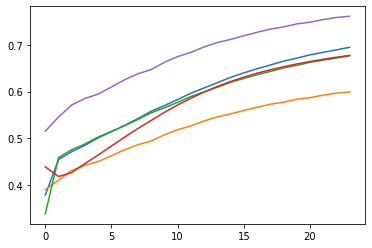

step: 0/2, D_loss: 0.14826643, G_loss_U: 2.6672142, G_loss_S: 0.1470018, E_loss_t0: 1.5697148


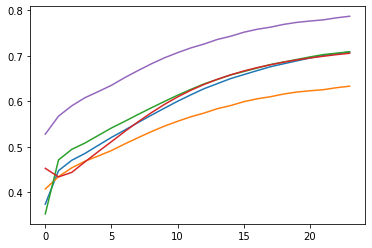

step: 0/2, D_loss: 0.14879932, G_loss_U: 2.663542, G_loss_S: 0.14588822, E_loss_t0: 1.5634505


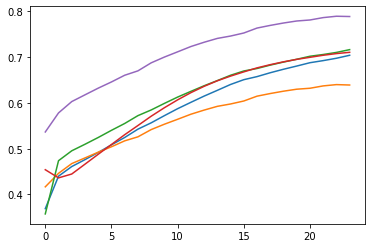

step: 0/2, D_loss: 0.14923085, G_loss_U: 2.6600072, G_loss_S: 0.14489186, E_loss_t0: 1.5480503


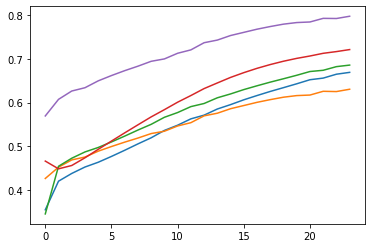

step: 0/2, D_loss: 0.15011984, G_loss_U: 2.7820852, G_loss_S: 0.14428803, E_loss_t0: 1.5437427


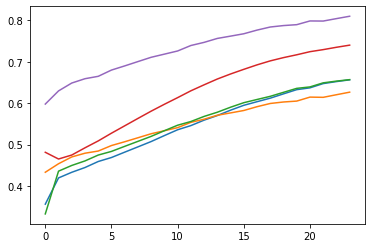

step: 0/2, D_loss: 0.13498935, G_loss_U: 2.779157, G_loss_S: 0.14327326, E_loss_t0: 1.5101957


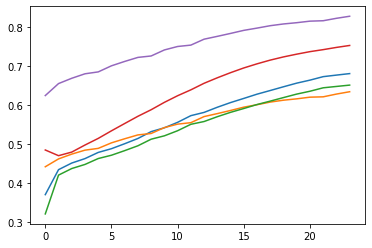

step: 0/2, D_loss: 0.13558179, G_loss_U: 2.7763824, G_loss_S: 0.14251488, E_loss_t0: 1.5173211


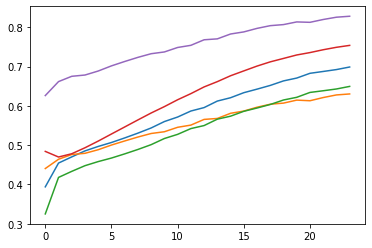

step: 0/2, D_loss: 0.136682, G_loss_U: 2.7735474, G_loss_S: 0.14176267, E_loss_t0: 1.4987172


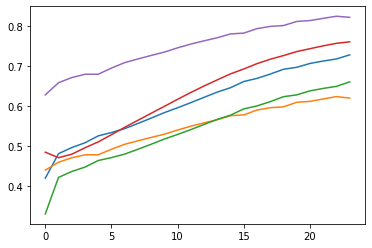

step: 0/2, D_loss: 0.13704062, G_loss_U: 2.7704241, G_loss_S: 0.14127861, E_loss_t0: 1.5443006


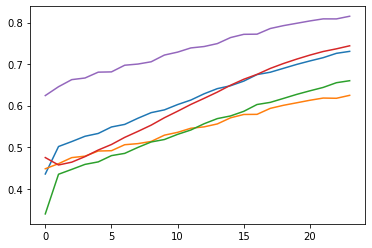

step: 0/2, D_loss: 0.13815314, G_loss_U: 2.766899, G_loss_S: 0.14070508, E_loss_t0: 1.5082897


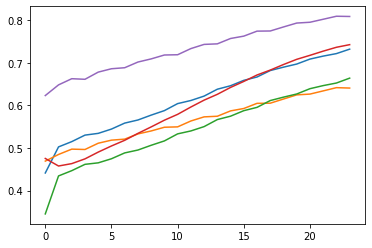

step: 0/2, D_loss: 0.13842641, G_loss_U: 2.7628844, G_loss_S: 0.13981481, E_loss_t0: 1.5095431


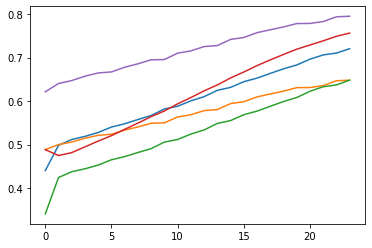

step: 0/2, D_loss: 0.13923603, G_loss_U: 2.7584362, G_loss_S: 0.13941118, E_loss_t0: 1.4937633


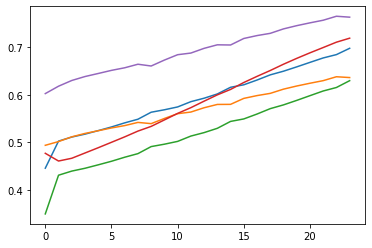

step: 0/2, D_loss: 0.13979445, G_loss_U: 2.753708, G_loss_S: 0.13895144, E_loss_t0: 1.4869651


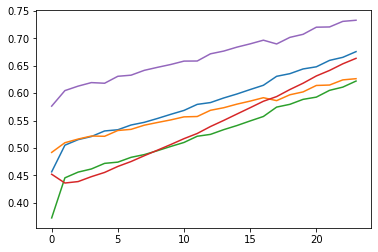

step: 0/2, D_loss: 0.1409709, G_loss_U: 2.7487, G_loss_S: 0.1385018, E_loss_t0: 1.471284


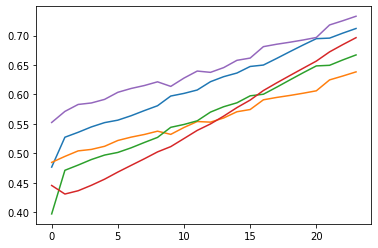

step: 0/2, D_loss: 0.14182572, G_loss_U: 2.7434108, G_loss_S: 0.1372119, E_loss_t0: 1.4857556


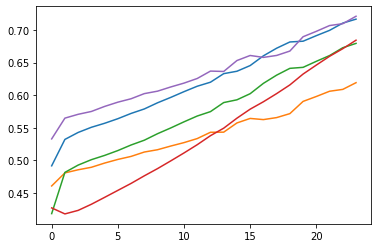

step: 0/2, D_loss: 0.1434072, G_loss_U: 2.7378864, G_loss_S: 0.13727245, E_loss_t0: 1.5311588


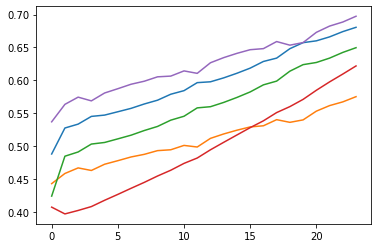

step: 0/2, D_loss: 0.14388014, G_loss_U: 2.7322931, G_loss_S: 0.13698931, E_loss_t0: 1.476553


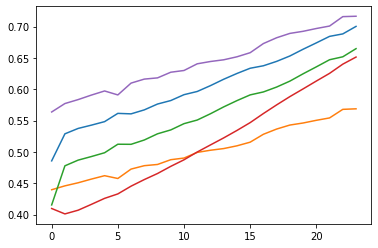

step: 0/2, D_loss: 0.14448003, G_loss_U: 2.7267172, G_loss_S: 0.13628753, E_loss_t0: 1.4761127


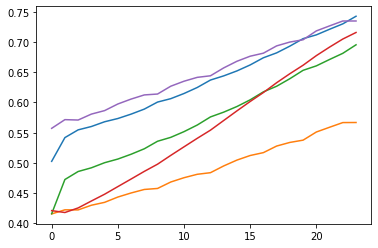

step: 0/2, D_loss: 0.14653778, G_loss_U: 2.7215269, G_loss_S: 0.13586129, E_loss_t0: 1.4537734


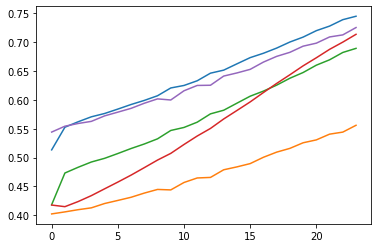

step: 1/2, D_loss: 0.14827095, G_loss_U: 2.6444263, G_loss_S: 0.13518977, E_loss_t0: 1.4530246


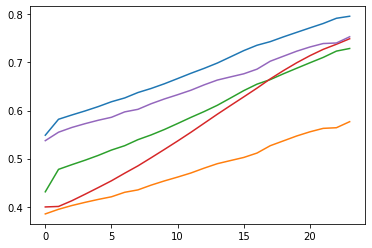

step: 1/2, D_loss: 0.14970908, G_loss_U: 2.6421146, G_loss_S: 0.13518298, E_loss_t0: 1.4491948


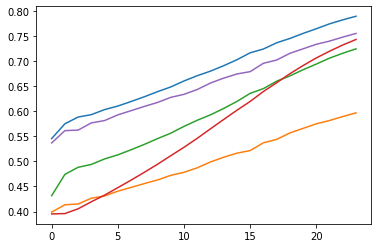

step: 1/2, D_loss: 0.15018012, G_loss_U: 2.578471, G_loss_S: 0.13553838, E_loss_t0: 1.461778


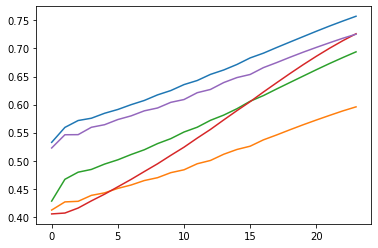

step: 1/2, D_loss: 0.15449741, G_loss_U: 2.5303926, G_loss_S: 0.13462508, E_loss_t0: 1.4254926


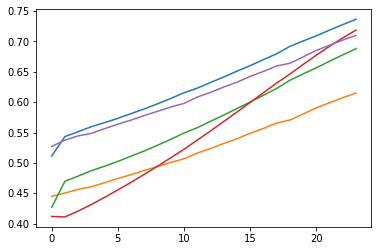

step: 1/2, D_loss: 0.15732384, G_loss_U: 2.4966254, G_loss_S: 0.13427758, E_loss_t0: 1.4249661


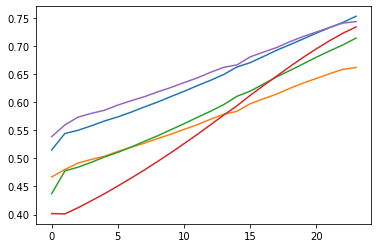

step: 1/2, D_loss: 0.16004784, G_loss_U: 2.4759548, G_loss_S: 0.13416743, E_loss_t0: 1.3988137


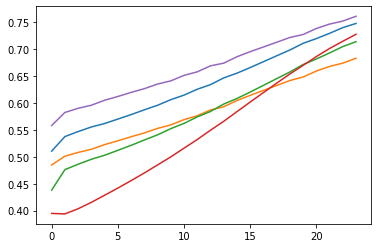

step: 1/2, D_loss: 0.16034533, G_loss_U: 2.4672265, G_loss_S: 0.13337938, E_loss_t0: 1.4547048


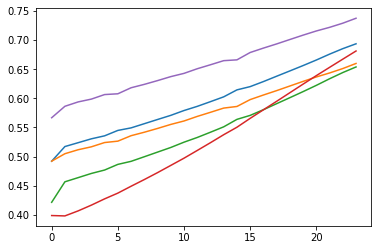

step: 1/2, D_loss: 0.1590961, G_loss_U: 2.4693055, G_loss_S: 0.13367224, E_loss_t0: 1.412543


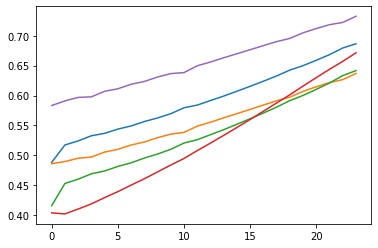

step: 1/2, D_loss: 0.15740106, G_loss_U: 2.481109, G_loss_S: 0.13264056, E_loss_t0: 1.4137442


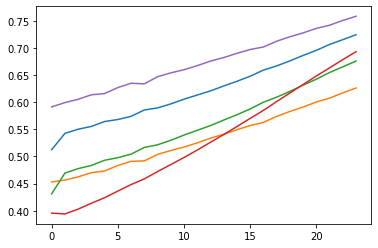

step: 1/2, D_loss: 0.15425302, G_loss_U: 2.5015342, G_loss_S: 0.13238928, E_loss_t0: 1.3951173


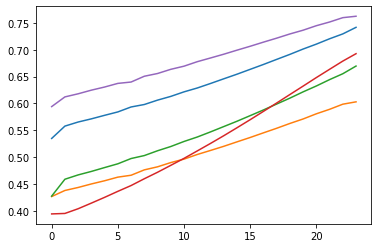

step: 1/2, D_loss: 0.15047687, G_loss_U: 2.5294363, G_loss_S: 0.13237116, E_loss_t0: 1.3926455


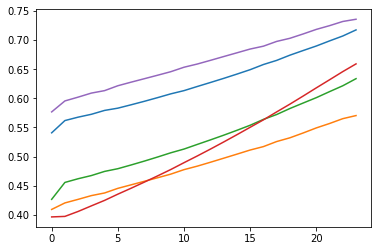

step: 1/2, D_loss: 0.14603841, G_loss_U: 2.5255368, G_loss_S: 0.13193877, E_loss_t0: 1.3986154


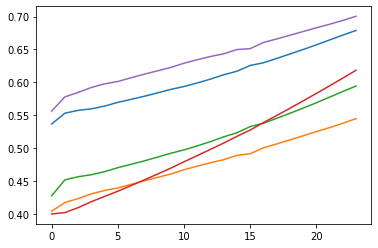

step: 1/2, D_loss: 0.14746356, G_loss_U: 2.520991, G_loss_S: 0.13136283, E_loss_t0: 1.3967716


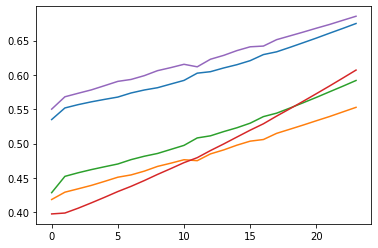

step: 1/2, D_loss: 0.14828925, G_loss_U: 2.516303, G_loss_S: 0.13097253, E_loss_t0: 1.3814079


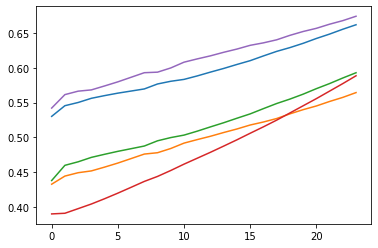

step: 1/2, D_loss: 0.14900343, G_loss_U: 2.5119407, G_loss_S: 0.13104741, E_loss_t0: 1.4292289


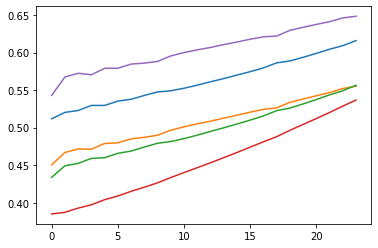

step: 1/2, D_loss: 0.14941432, G_loss_U: 2.5082695, G_loss_S: 0.13076706, E_loss_t0: 1.4361578


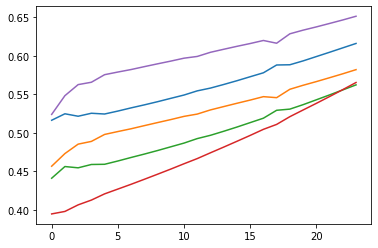

step: 1/2, D_loss: 0.1510794, G_loss_U: 2.5439095, G_loss_S: 0.13007228, E_loss_t0: 1.3765291


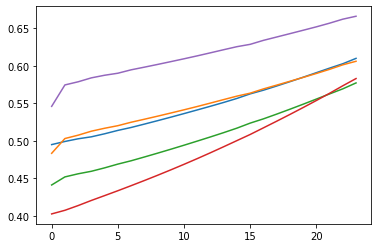

step: 1/2, D_loss: 0.14578491, G_loss_U: 2.5418656, G_loss_S: 0.12933356, E_loss_t0: 1.3840345


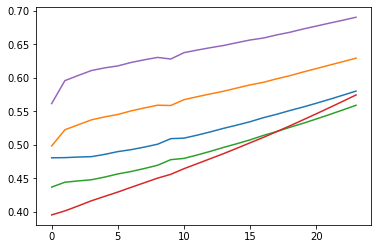

step: 1/2, D_loss: 0.14600527, G_loss_U: 2.5403583, G_loss_S: 0.12939282, E_loss_t0: 1.3875678


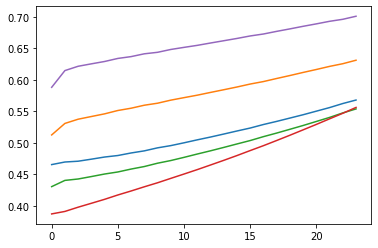

step: 1/2, D_loss: 0.14679076, G_loss_U: 2.5392733, G_loss_S: 0.12894219, E_loss_t0: 1.4190496


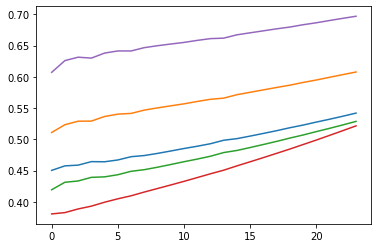

step: 1/2, D_loss: 0.14690426, G_loss_U: 2.5384471, G_loss_S: 0.12863354, E_loss_t0: 1.4106398


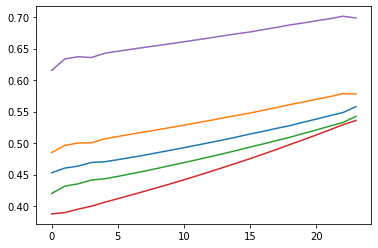

step: 1/2, D_loss: 0.1476291, G_loss_U: 2.5378187, G_loss_S: 0.12808101, E_loss_t0: 1.3932599


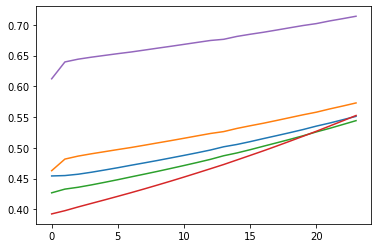

step: 1/2, D_loss: 0.1478648, G_loss_U: 2.537293, G_loss_S: 0.12794104, E_loss_t0: 1.3834682


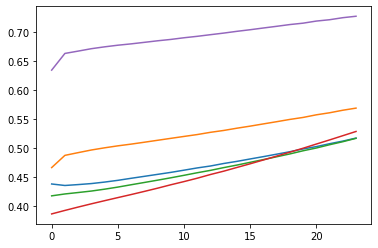

step: 1/2, D_loss: 0.14871036, G_loss_U: 2.5367873, G_loss_S: 0.127667, E_loss_t0: 1.4159094


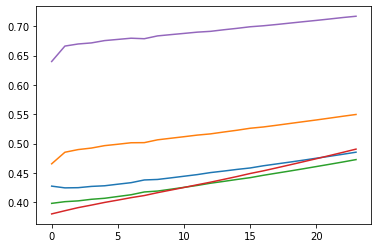

step: 1/2, D_loss: 0.14921276, G_loss_U: 2.5363305, G_loss_S: 0.1279147, E_loss_t0: 1.3612546


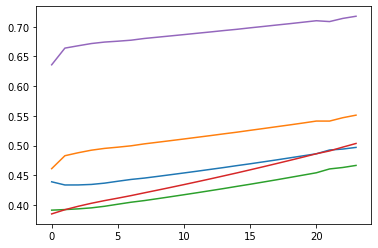

step: 1/2, D_loss: 0.1492534, G_loss_U: 2.535878, G_loss_S: 0.1272887, E_loss_t0: 1.3716


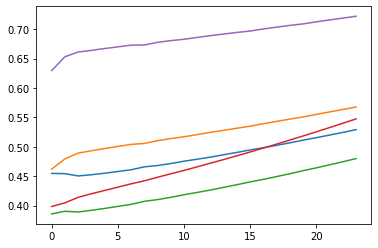

step: 1/2, D_loss: 0.15026537, G_loss_U: 2.580597, G_loss_S: 0.12697044, E_loss_t0: 1.3794616


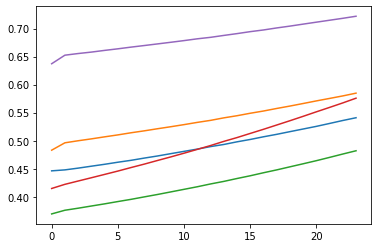

step: 1/2, D_loss: 0.14331682, G_loss_U: 2.5801654, G_loss_S: 0.12653871, E_loss_t0: 1.3895999


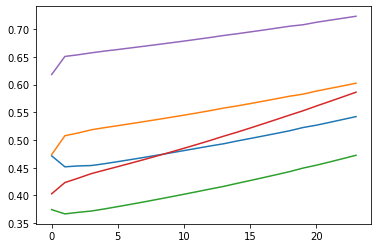

step: 1/2, D_loss: 0.14428261, G_loss_U: 2.5797446, G_loss_S: 0.12551415, E_loss_t0: 1.3883739


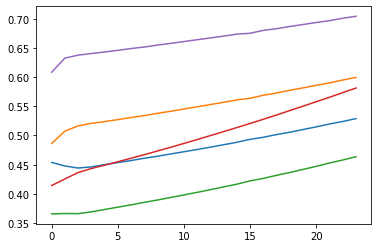

step: 1/2, D_loss: 0.14398979, G_loss_U: 2.5793738, G_loss_S: 0.12473446, E_loss_t0: 1.3459005


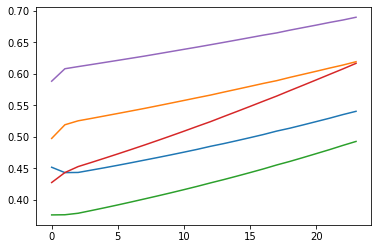

step: 1/2, D_loss: 0.1441983, G_loss_U: 2.5790303, G_loss_S: 0.124356136, E_loss_t0: 1.3613777


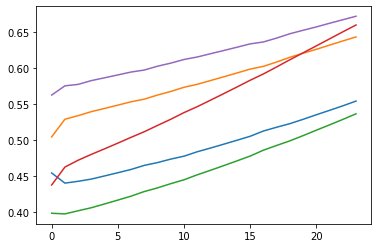

step: 1/2, D_loss: 0.14537042, G_loss_U: 2.5787246, G_loss_S: 0.12452029, E_loss_t0: 1.4200248


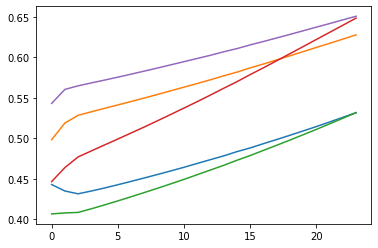

step: 1/2, D_loss: 0.14576992, G_loss_U: 2.5784326, G_loss_S: 0.12429325, E_loss_t0: 1.3532928


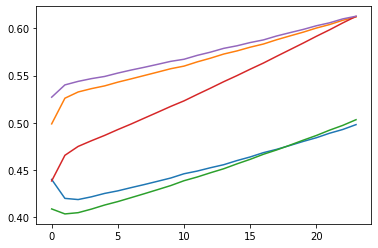

step: 1/2, D_loss: 0.14552936, G_loss_U: 2.5781708, G_loss_S: 0.12241576, E_loss_t0: 1.376727


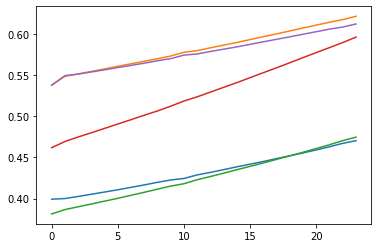

step: 1/2, D_loss: 0.14699866, G_loss_U: 2.5779183, G_loss_S: 0.122475825, E_loss_t0: 1.3912859


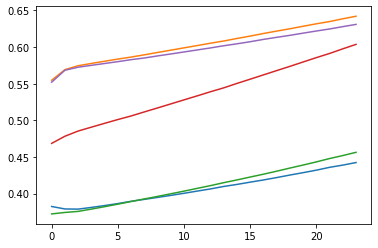

step: 1/2, D_loss: 0.14724955, G_loss_U: 2.5776832, G_loss_S: 0.12197803, E_loss_t0: 1.3523957


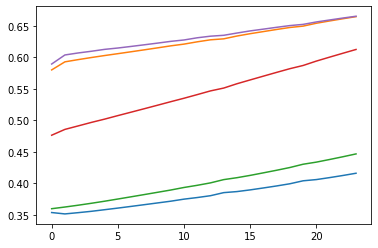

step: 1/2, D_loss: 0.14812186, G_loss_U: 2.5774667, G_loss_S: 0.12265959, E_loss_t0: 1.360304


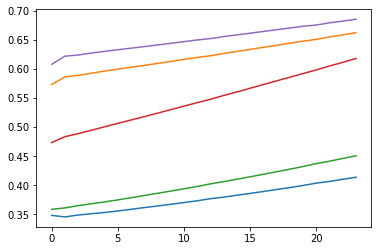

step: 1/2, D_loss: 0.14775796, G_loss_U: 2.5772746, G_loss_S: 0.121011235, E_loss_t0: 1.3911082


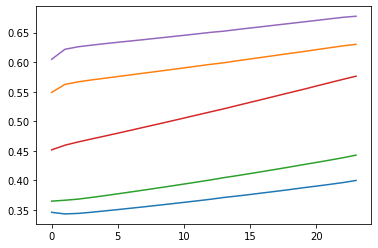

step: 1/2, D_loss: 0.14860293, G_loss_U: 2.577093, G_loss_S: 0.12046346, E_loss_t0: 1.4010346


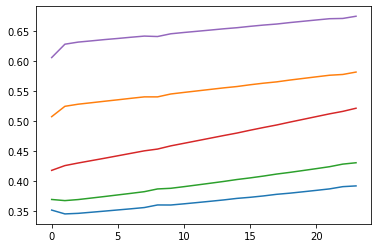

step: 1/2, D_loss: 0.14899465, G_loss_U: 2.5769162, G_loss_S: 0.12091434, E_loss_t0: 1.335027


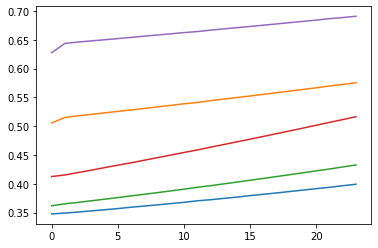

step: 1/2, D_loss: 0.14918527, G_loss_U: 2.5767448, G_loss_S: 0.118932694, E_loss_t0: 1.3374476


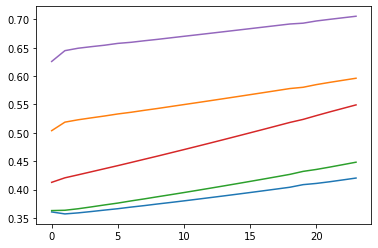

step: 1/2, D_loss: 0.15056138, G_loss_U: 2.6274889, G_loss_S: 0.118239045, E_loss_t0: 1.3597621


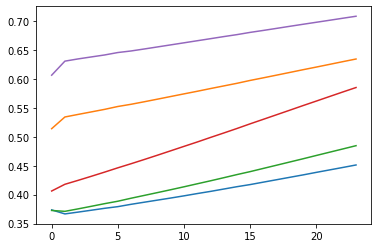

step: 1/2, D_loss: 0.14300302, G_loss_U: 2.6273203, G_loss_S: 0.118789606, E_loss_t0: 1.356741


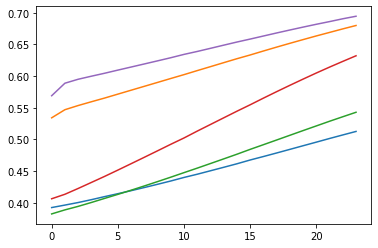

step: 1/2, D_loss: 0.14297348, G_loss_U: 2.6271436, G_loss_S: 0.11765221, E_loss_t0: 1.3732187


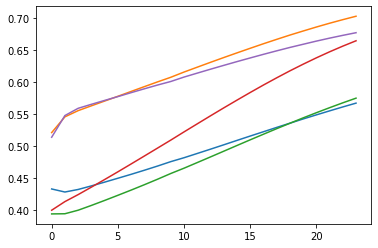

step: 1/2, D_loss: 0.143717, G_loss_U: 2.6269543, G_loss_S: 0.11738469, E_loss_t0: 1.3203053


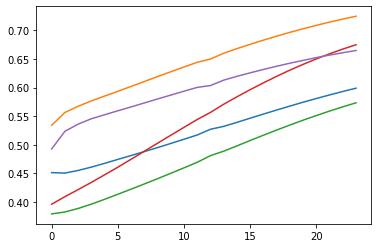

step: 1/2, D_loss: 0.14370441, G_loss_U: 2.626751, G_loss_S: 0.11745028, E_loss_t0: 1.3269273


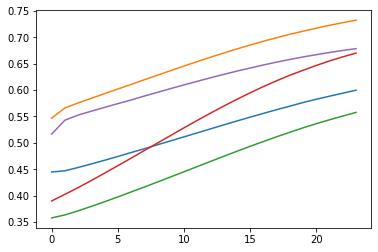

step: 1/2, D_loss: 0.14514387, G_loss_U: 2.6265314, G_loss_S: 0.11666659, E_loss_t0: 1.321638


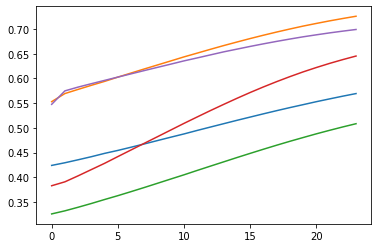

step: 1/2, D_loss: 0.14434679, G_loss_U: 2.6262882, G_loss_S: 0.11578452, E_loss_t0: 1.3497249


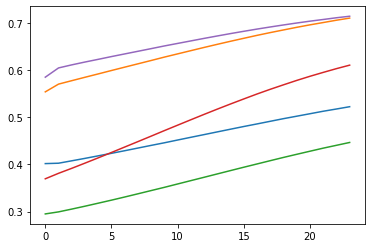

step: 1/2, D_loss: 0.14514801, G_loss_U: 2.6260135, G_loss_S: 0.11562295, E_loss_t0: 1.3099251


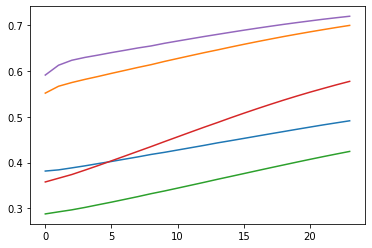

step: 1/2, D_loss: 0.14571954, G_loss_U: 2.625697, G_loss_S: 0.11423238, E_loss_t0: 1.3107169


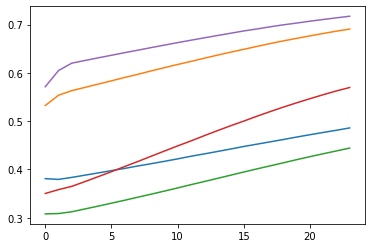

step: 1/2, D_loss: 0.14694598, G_loss_U: 2.6253273, G_loss_S: 0.114733696, E_loss_t0: 1.288373


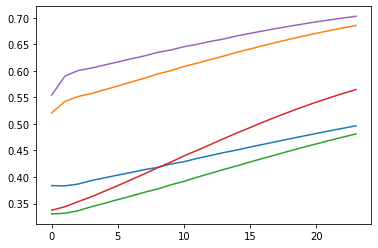

step: 1/2, D_loss: 0.14788179, G_loss_U: 2.6248918, G_loss_S: 0.11424623, E_loss_t0: 1.3240662


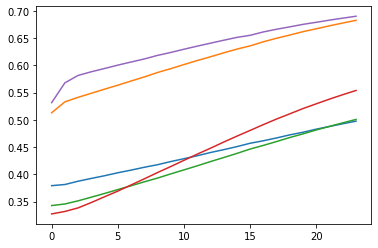

step: 1/2, D_loss: 0.14889267, G_loss_U: 2.6243877, G_loss_S: 0.11389467, E_loss_t0: 1.3171358


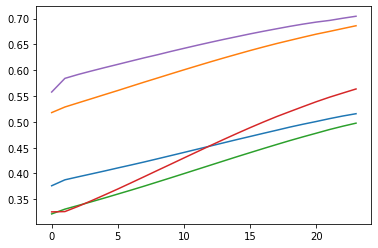

step: 1/2, D_loss: 0.14997429, G_loss_U: 2.6238272, G_loss_S: 0.11369881, E_loss_t0: 1.3171046


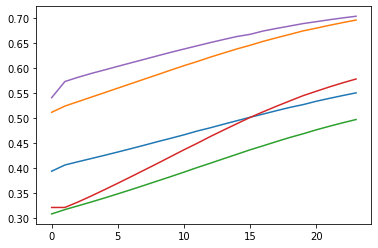

step: 1/2, D_loss: 0.15053615, G_loss_U: 2.6788557, G_loss_S: 0.11301751, E_loss_t0: 1.2899367


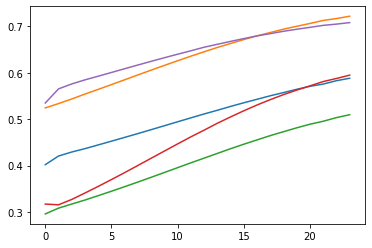

step: 1/2, D_loss: 0.14423391, G_loss_U: 2.678161, G_loss_S: 0.11276872, E_loss_t0: 1.3042138


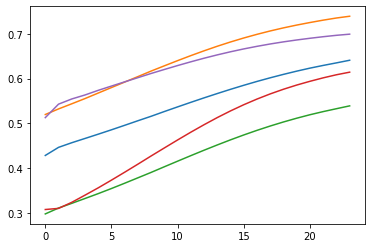

step: 1/2, D_loss: 0.14497222, G_loss_U: 2.6773891, G_loss_S: 0.11154375, E_loss_t0: 1.2520404


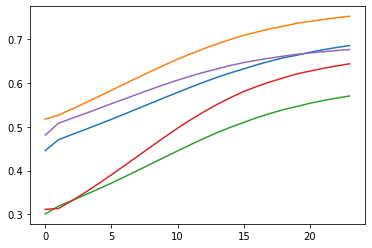

step: 1/2, D_loss: 0.14568771, G_loss_U: 2.6765764, G_loss_S: 0.11144303, E_loss_t0: 1.2778319


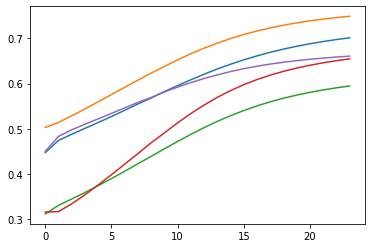

step: 1/2, D_loss: 0.14591369, G_loss_U: 2.6757286, G_loss_S: 0.11068651, E_loss_t0: 1.2534186


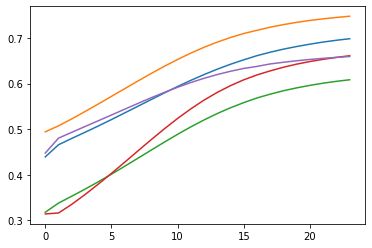

step: 1/2, D_loss: 0.14752802, G_loss_U: 2.674862, G_loss_S: 0.110598624, E_loss_t0: 1.2812412


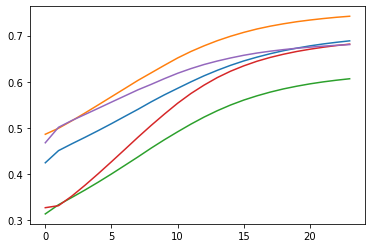

step: 1/2, D_loss: 0.14853442, G_loss_U: 2.6739643, G_loss_S: 0.11006709, E_loss_t0: 1.2791607


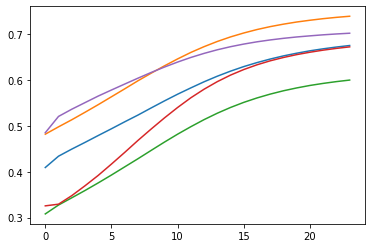

step: 1/2, D_loss: 0.14917068, G_loss_U: 2.6730106, G_loss_S: 0.1094432, E_loss_t0: 1.2846079


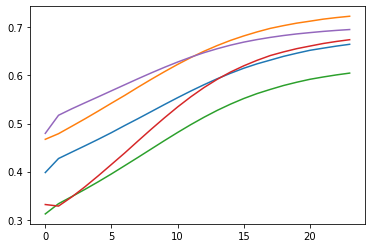

step: 1/2, D_loss: 0.15177217, G_loss_U: 2.7316494, G_loss_S: 0.10926966, E_loss_t0: 1.2874923


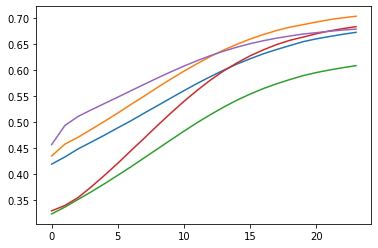

step: 1/2, D_loss: 0.14450714, G_loss_U: 2.7306898, G_loss_S: 0.10916991, E_loss_t0: 1.2643796


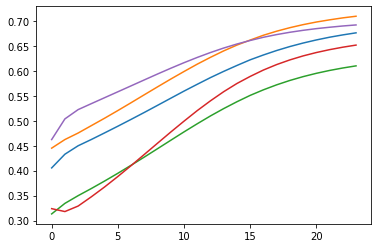

step: 1/2, D_loss: 0.14575039, G_loss_U: 2.72972, G_loss_S: 0.109454654, E_loss_t0: 1.2669116


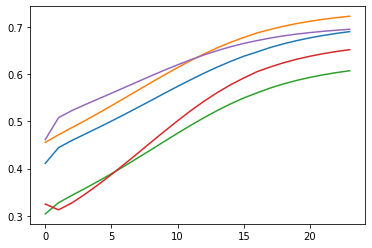

step: 1/2, D_loss: 0.14594501, G_loss_U: 2.7288113, G_loss_S: 0.107719064, E_loss_t0: 1.2326788


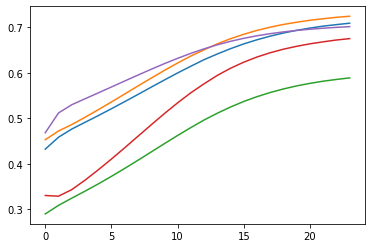

step: 1/2, D_loss: 0.14827119, G_loss_U: 2.728031, G_loss_S: 0.1077547, E_loss_t0: 1.2906988


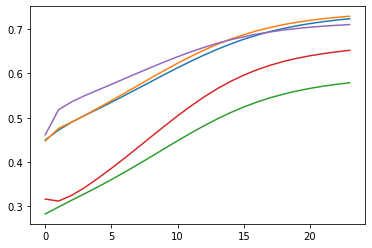

step: 1/2, D_loss: 0.14892703, G_loss_U: 2.7273934, G_loss_S: 0.10747122, E_loss_t0: 1.2560011


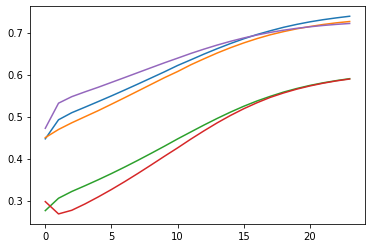

step: 1/2, D_loss: 0.15204957, G_loss_U: 2.7897685, G_loss_S: 0.10735976, E_loss_t0: 1.2333292


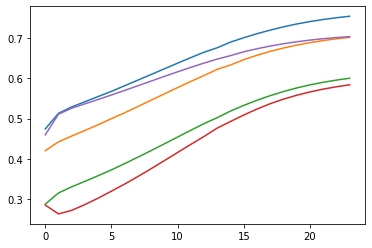

step: 1/2, D_loss: 0.1436906, G_loss_U: 2.7893932, G_loss_S: 0.106680475, E_loss_t0: 1.21942


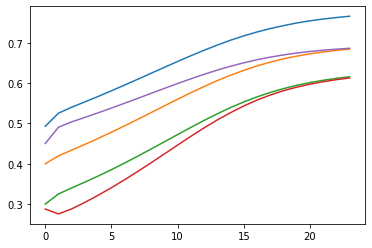

step: 1/2, D_loss: 0.14561825, G_loss_U: 2.7891037, G_loss_S: 0.10618349, E_loss_t0: 1.2187434


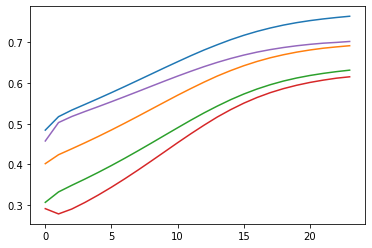

step: 1/2, D_loss: 0.14784527, G_loss_U: 2.7888806, G_loss_S: 0.106728464, E_loss_t0: 1.1945931


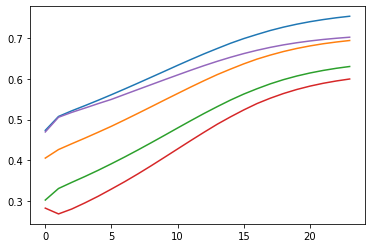

step: 1/2, D_loss: 0.14898328, G_loss_U: 2.7887056, G_loss_S: 0.10650406, E_loss_t0: 1.1838288


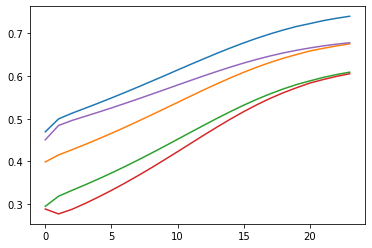

step: 1/2, D_loss: 0.14982408, G_loss_U: 2.7885654, G_loss_S: 0.10557828, E_loss_t0: 1.1903858


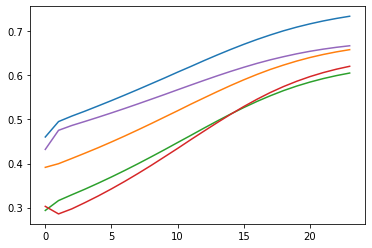

step: 1/2, D_loss: 0.14999834, G_loss_U: 2.7884505, G_loss_S: 0.10531145, E_loss_t0: 1.1546764


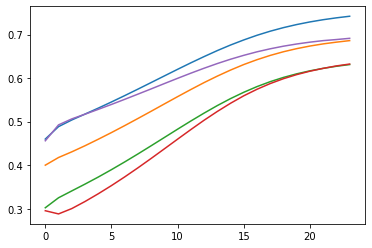

step: 1/2, D_loss: 0.15216298, G_loss_U: 2.8534, G_loss_S: 0.104969315, E_loss_t0: 1.182068


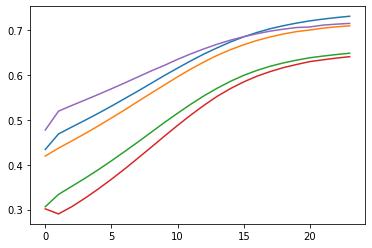

step: 1/2, D_loss: 0.14278868, G_loss_U: 2.853317, G_loss_S: 0.104793794, E_loss_t0: 1.1714798


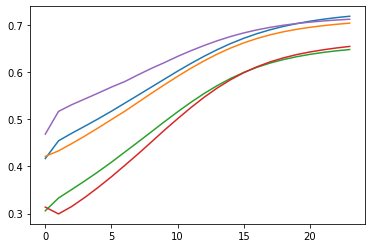

step: 1/2, D_loss: 0.14240871, G_loss_U: 2.8532374, G_loss_S: 0.10527677, E_loss_t0: 1.1426085


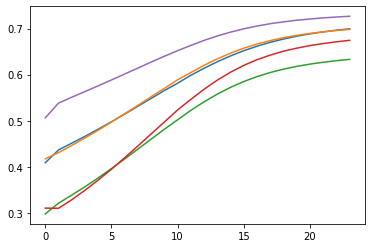

step: 1/2, D_loss: 0.14463356, G_loss_U: 2.8531616, G_loss_S: 0.10425369, E_loss_t0: 1.2001699


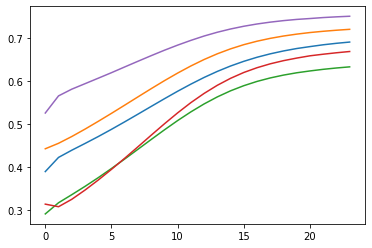

step: 1/2, D_loss: 0.14621617, G_loss_U: 2.8530865, G_loss_S: 0.10483394, E_loss_t0: 1.1409074


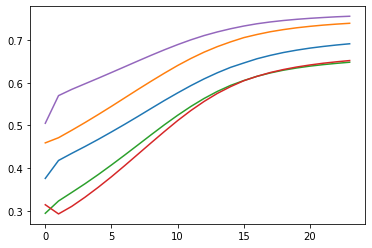

step: 1/2, D_loss: 0.14586267, G_loss_U: 2.8530073, G_loss_S: 0.10440458, E_loss_t0: 1.1233671


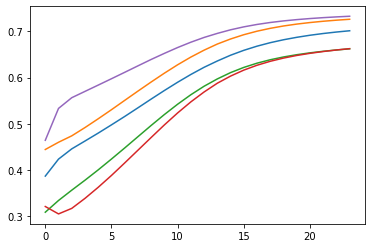

step: 1/2, D_loss: 0.14699899, G_loss_U: 2.8529246, G_loss_S: 0.10437824, E_loss_t0: 1.132145


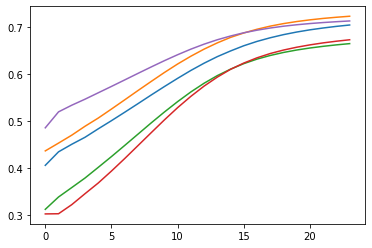

step: 1/2, D_loss: 0.15050048, G_loss_U: 2.9190257, G_loss_S: 0.104033455, E_loss_t0: 1.1661236


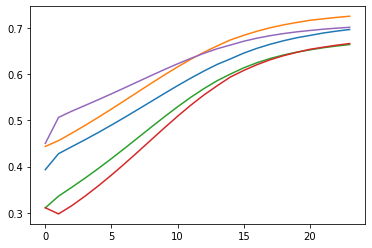

step: 1/2, D_loss: 0.14010882, G_loss_U: 2.9189339, G_loss_S: 0.10367763, E_loss_t0: 1.1693158


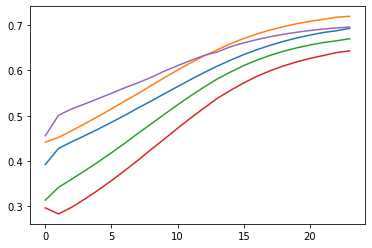

step: 1/2, D_loss: 0.1398995, G_loss_U: 2.9188316, G_loss_S: 0.10316934, E_loss_t0: 1.1687342


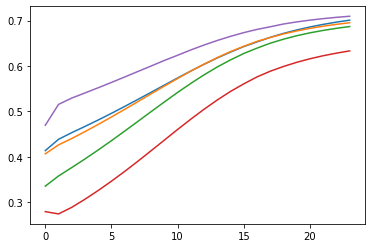

step: 1/2, D_loss: 0.14285833, G_loss_U: 2.918721, G_loss_S: 0.10369827, E_loss_t0: 1.1487594


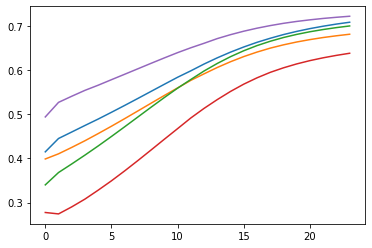

step: 1/2, D_loss: 0.14325312, G_loss_U: 2.918605, G_loss_S: 0.10322169, E_loss_t0: 1.1117284


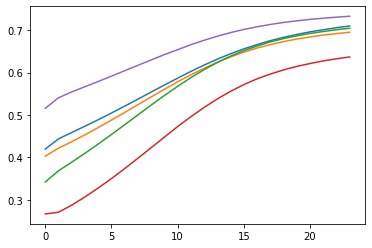

step: 1/2, D_loss: 0.14349246, G_loss_U: 2.918479, G_loss_S: 0.10325878, E_loss_t0: 1.1259536


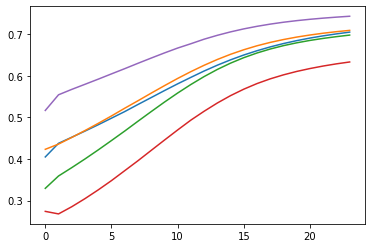

step: 1/2, D_loss: 0.14539291, G_loss_U: 2.9183362, G_loss_S: 0.102495424, E_loss_t0: 1.129692


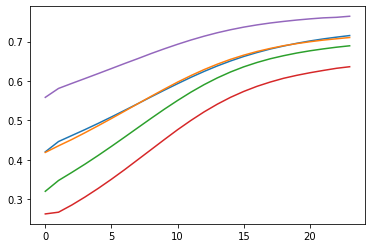

step: 1/2, D_loss: 0.14653915, G_loss_U: 2.918173, G_loss_S: 0.102475315, E_loss_t0: 1.1602873


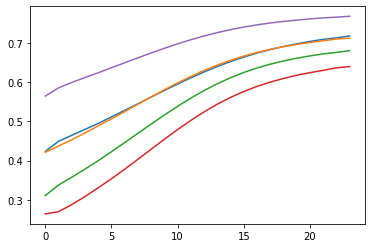

step: 1/2, D_loss: 0.14969862, G_loss_U: 2.9179866, G_loss_S: 0.10173186, E_loss_t0: 1.1115257


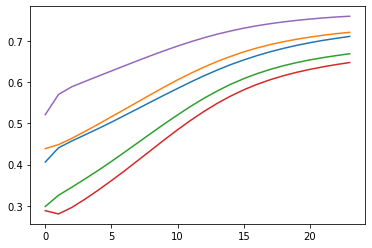

step: 1/2, D_loss: 0.15138589, G_loss_U: 2.983915, G_loss_S: 0.10195425, E_loss_t0: 1.0909173


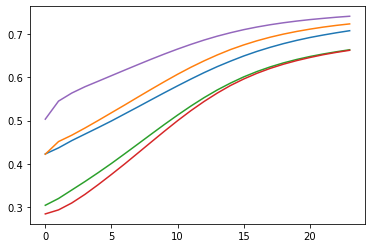

step: 1/2, D_loss: 0.14016949, G_loss_U: 2.9836872, G_loss_S: 0.10206475, E_loss_t0: 1.0714988


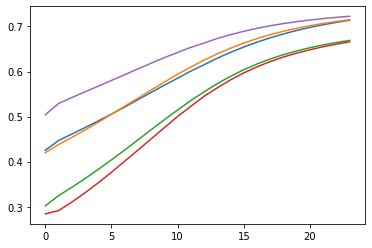

step: 1/2, D_loss: 0.14170535, G_loss_U: 2.9834054, G_loss_S: 0.1023451, E_loss_t0: 1.0598767


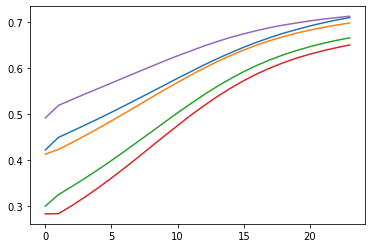

step: 1/2, D_loss: 0.14414942, G_loss_U: 2.9830637, G_loss_S: 0.101757705, E_loss_t0: 1.0478898


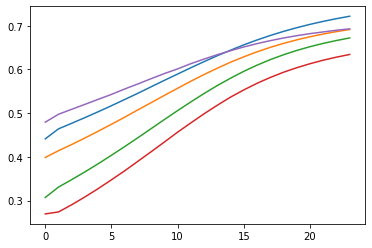

step: 1/2, D_loss: 0.14562614, G_loss_U: 2.9826748, G_loss_S: 0.10094792, E_loss_t0: 1.1024678


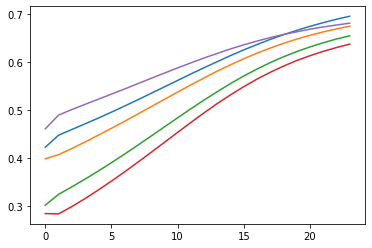

step: 1/2, D_loss: 0.14835608, G_loss_U: 2.9822123, G_loss_S: 0.100584626, E_loss_t0: 1.1161813


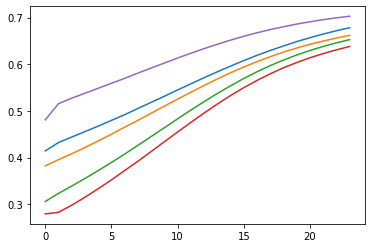

step: 1/2, D_loss: 0.14881101, G_loss_U: 2.981684, G_loss_S: 0.10034476, E_loss_t0: 1.0948967


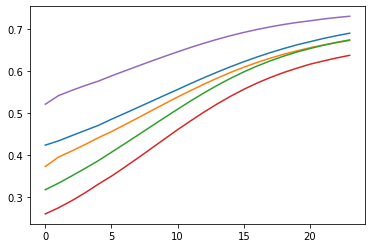

step: 1/2, D_loss: 0.15175222, G_loss_U: 3.0462983, G_loss_S: 0.10038369, E_loss_t0: 1.0557153


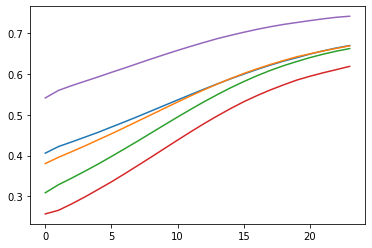

step: 1/2, D_loss: 0.13940571, G_loss_U: 3.0457227, G_loss_S: 0.09993585, E_loss_t0: 1.0420419


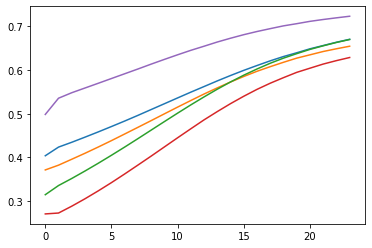

Finish Joint Training


In [9]:
Generator, Embedder, Supervisor, Recovery, Discriminator, checkpoints = TimeGAN(data, parameters)

A Data Set of the same size and dimensions of the original synthetic data Set is generated and visualized and both are compared

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.267s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.000978
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.023006
[t-SNE] KL divergence after 300 iterations: 0.840190


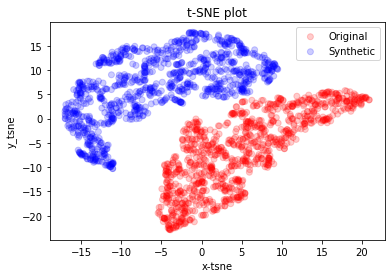

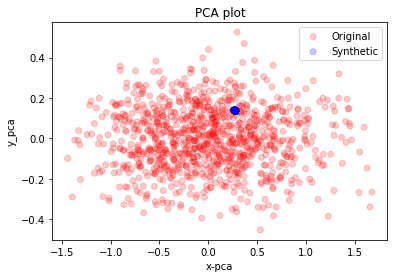

In [10]:
random_test = random_generator(no, dim, extract_time(data)[0], extract_time(data)[1])
test_sample = Generator(torch.tensor(random_generator(no, dim, extract_time(data)[0], extract_time(data)[1])).float())[0]
test_sample = torch.reshape(test_sample, (no, seq_len, parameters['hidden_dim']))
test_recovery = Recovery(test_sample)
test_recovery = torch.reshape(test_recovery[0], (no, seq_len, dim))
visualization(data, test_recovery.detach().numpy(), 'tsne')
visualization(data, test_recovery.detach().numpy(), 'pca')
  